In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

**Load the dataset**

In [2]:
data=pd.read_csv("train.csv",index_col="PassengerId")

In [3]:
data.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**We will first explore the Age of Passengers. We already know some basic information such as the mean of Age data is 29 years while median is 27 years. Min age is 0 while max age is 79 years. Lets explore more to gain more insight.**

In [5]:
percentile_90 = data['Age'].quantile(0.90)
percentile_90

49.0

**This shows that 90% of Passengers Age is Below 49 years. Lets make a histogram to see the distribution of Age**

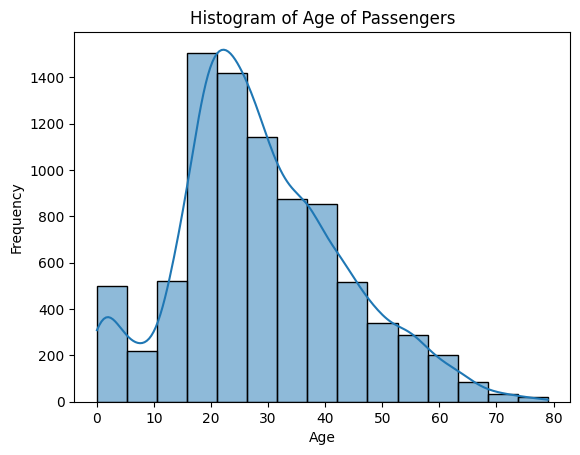

In [6]:
Age=data['Age'].dropna()
sns.histplot(Age,bins=15,kde=True)
plt.xlabel('Age')          
plt.ylabel('Frequency')     
plt.title('Histogram of Age of Passengers')
plt.show()

**As We can see from the histogram most of the passengers are on age below 49 years**

In [7]:
nan_count_HomePlanet = data['HomePlanet'].isnull().sum()
nan_count_HomePlanet

201

In [8]:
nan_count_Age = data['Age'].isnull().sum()
nan_count_Age

179

**Out of 8693 data only 201 data in Home_Planet category is missing while only 179 data is missing in age category. Since missing data numbers are small, we can remove these columns for future consideration**

In [9]:
data_clean = data.dropna(subset=['Age', 'HomePlanet'])

In [10]:
mean_age_per_category=data_clean.groupby('HomePlanet')['Age'].mean()
mean_age_per_category

HomePlanet
Earth     26.068232
Europa    34.419664
Mars      29.297203
Name: Age, dtype: float64

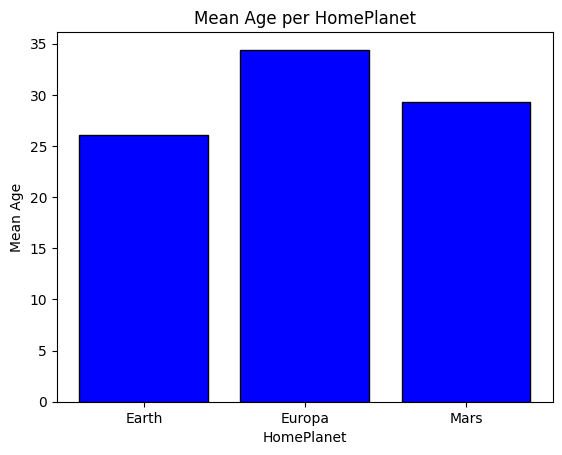

In [11]:
plt.bar(mean_age_per_category.index, mean_age_per_category.values, color='blue', edgecolor='black',)

# Customize the axis labels and title
plt.xlabel('HomePlanet')
plt.ylabel('Mean Age')
plt.title('Mean Age per HomePlanet')

# Display the plot
plt.show()

**This shows that Europa has the Highest mean of 34 while Earth had mean Age around 26 years and Mars had mean age of 29 years**

In [12]:
nan_count_RoomService = data['RoomService'].isnull().sum()
nan_count_RoomService

181

In [13]:
zero_fare_count = (data['RoomService'] == 0).sum()
zero_fare_count

5577

In [14]:
data_clean_2=data_clean.dropna(subset=['RoomService'])

**To create scatterplot between Age and RoomService, all the RoomService having 0 value should be removed to gain good clarity**

In [15]:
data_clean_Scatter_AgevsRoomService = data_clean_2
data_clean_Scatter_AgevsRoomService.loc[:, 'TotalSpending']=data_clean_2['RoomService']+data_clean_2['FoodCourt']+data_clean_2['ShoppingMall']+data_clean_2['Spa']+data_clean_2['VRDeck']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14864\3921084810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_Scatter_AgevsRoomService.loc[:, 'TotalSpending']=data_clean_2['RoomService']+data_clean_2['FoodCourt']+data_clean_2['ShoppingMall']+data_clean_2['Spa']+data_clean_2['VRDeck']


In [16]:
data_clean_Scatter_AgevsRoomService.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpending
count,8141.000000,8141.000000,7966.000000,7948.00000,7965.000000,7959.000000,7438.000000
mean,28.866478,226.423044,464.431333,176.46540,310.732329,304.697826,1498.157435
std,14.480122,674.678833,1623.475195,613.17147,1135.979248,1148.990480,2870.470969
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.00000,0.000000,0.000000,737.000000
75%,38.000000,48.000000,81.000000,29.00000,61.000000,47.000000,1513.750000
max,79.000000,14327.000000,29813.000000,23492.00000,22408.000000,24133.000000,35987.000000


In [17]:
data_clean_Scatter_AgevsRoomService['TotalSpending'].isnull().sum()

703

In [18]:
data_clean_Scatter_AgevsRoomService_clean=data_clean_Scatter_AgevsRoomService.dropna(subset=['TotalSpending'])

In [19]:
((data_clean_Scatter_AgevsRoomService_clean['TotalSpending']>0) & (data_clean_Scatter_AgevsRoomService_clean['TotalSpending']<7000)).sum()

4002

**As we can see out of 4346(excluding 0) data points 40002 lies in the range from 0 to 7000, so we will set this as y limit for our scatterplot and clustering**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14864\2896186678.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


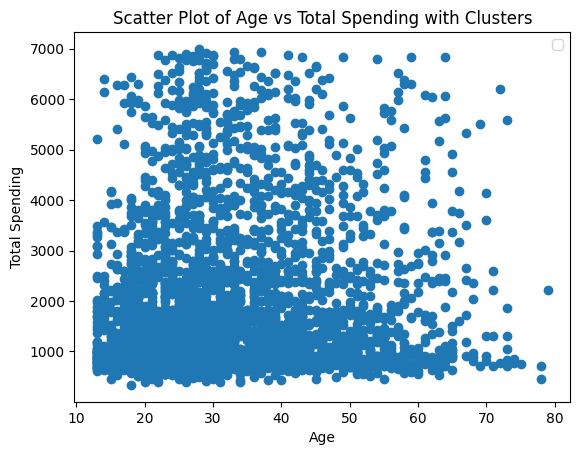

In [20]:
data_clean_Scatter_AgevsRoomService_clean_2=data_clean_Scatter_AgevsRoomService_clean[(data_clean_Scatter_AgevsRoomService_clean['TotalSpending']>0) & (data_clean_Scatter_AgevsRoomService_clean['TotalSpending']<7000)]
plt.scatter(data_clean_Scatter_AgevsRoomService_clean_2['Age'],data_clean_Scatter_AgevsRoomService_clean_2['TotalSpending'],alpha=1)

# Customize the axis labels and title
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.title('Scatter Plot of Age vs Total Spending with Clusters')
plt.legend()
plt.show()

**From this scatterplot we can see that Passengers spent Below 2000 and people above 10 and below 40 are highest in number**

In [21]:
nan_value_cyrosleep=data_clean_2['CryoSleep'].isnull().sum()
nan_value_cyrosleep

212

In [22]:
data_clean_3=data_clean_2.dropna(subset=['CryoSleep'])

In [23]:
data_clean_3.groupby('CryoSleep')['Age'].mean()

CryoSleep
False    29.691119
True     27.440895
Name: Age, dtype: float64

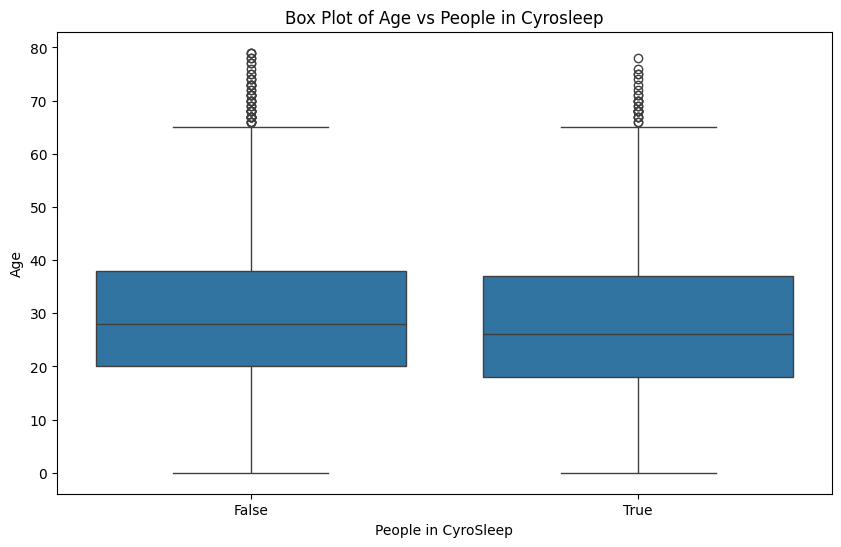

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CryoSleep', y='Age', data=data_clean_3)

# Customize the axis labels and title
plt.xlabel('People in CyroSleep')
plt.ylabel('Age')
plt.title('Box Plot of Age vs People in Cyrosleep')

# Display the plot
plt.show()

**The median,mean,25% and 75% quartile of age of passengers in cyrosleep and not in cyroSleep seems almost identical**

In [25]:
nan_value_destination=data_clean_3['Destination'].isnull().sum()
nan_value_destination

168

In [26]:
data_clean_4=data_clean_3.dropna(subset=['Destination'])

In [27]:
data_clean_3.groupby('Destination')['Age'].mean()

Destination
55 Cancri e      29.345345
PSO J318.5-22    27.796143
TRAPPIST-1e      28.863873
Name: Age, dtype: float64

In [28]:
data_clean_3.groupby('Destination')['Age'].median()

Destination
55 Cancri e      28.0
PSO J318.5-22    24.0
TRAPPIST-1e      27.0
Name: Age, dtype: float64

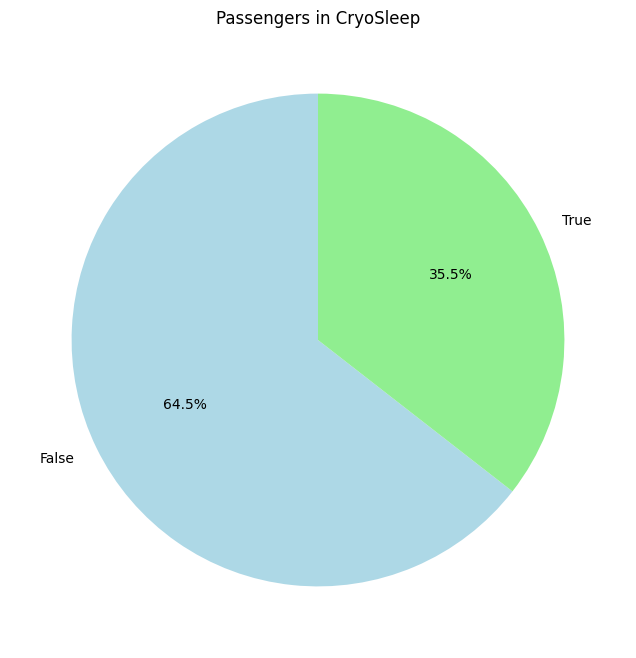

In [29]:
cryo_sleep_counts = data_clean_3['CryoSleep'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cryo_sleep_counts, labels=cryo_sleep_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Passengers in CryoSleep')
plt.show()

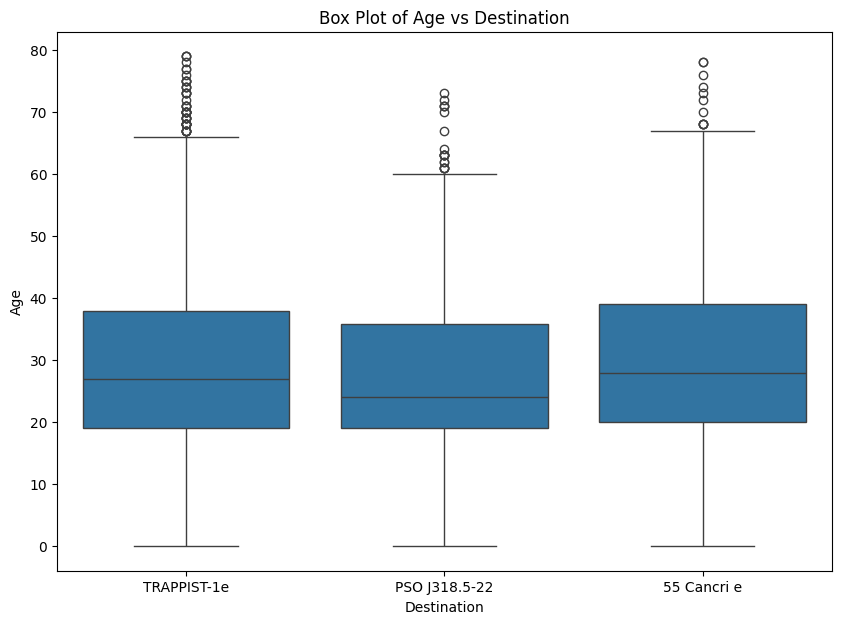

In [30]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Destination', y='Age', data=data_clean_4)

# Customize the axis labels and title
plt.xlabel('Destination')
plt.ylabel('Age')
plt.title('Box Plot of Age vs Destination')

# Display the plot
plt.show()

**The distribution of Age and destination is shown and for the 3 destination it seems almost identical**

**64.5% of Passengers are not in cyrosleep while 35.5% are in cyrosleep**

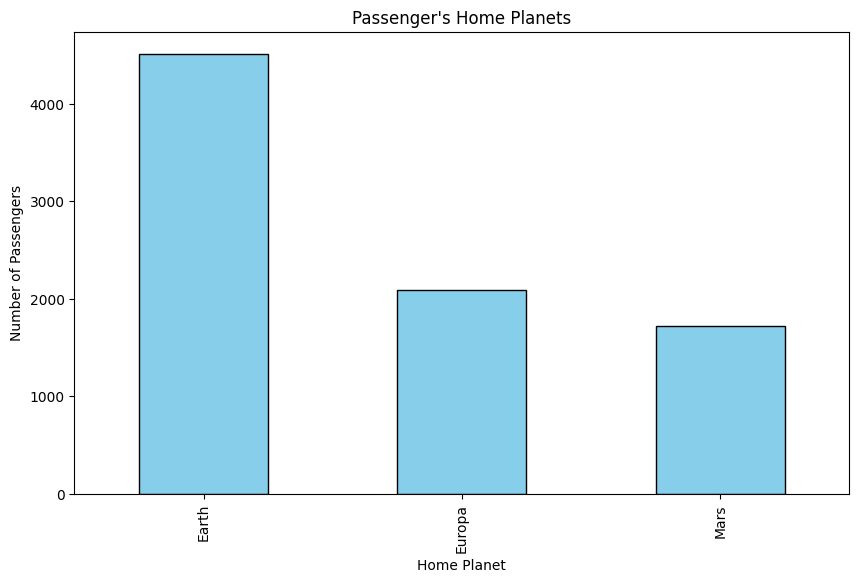

Percentage of Passengers in each Home_Planet
Earth     54.29
Europa    25.08
Mars      20.64
Name: count, dtype: float64


In [31]:
Passenger_Home_Planets = data_clean['HomePlanet'].value_counts()
home_planet_percentages = (Passenger_Home_Planets / len(data_clean) * 100).round(2)
Passenger_Home_Planets.index.name='Home_Planet'

plt.figure(figsize=(10, 6))
Passenger_Home_Planets.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the axis labels and title
plt.xlabel('Home Planet')
plt.ylabel('Number of Passengers')
plt.title('Passenger\'s Home Planets')

# Display the plot
plt.show()
print(f"Percentage of Passengers in each {home_planet_percentages}")

**54.3% Passenger are from Earth while only 20.5% are from Mars** 

In [32]:
nan_value_vip=data_clean_4['VIP'].isnull().sum()
nan_value_vip

180

In [33]:
data_clean_5=data_clean_4.dropna(subset=['VIP'])

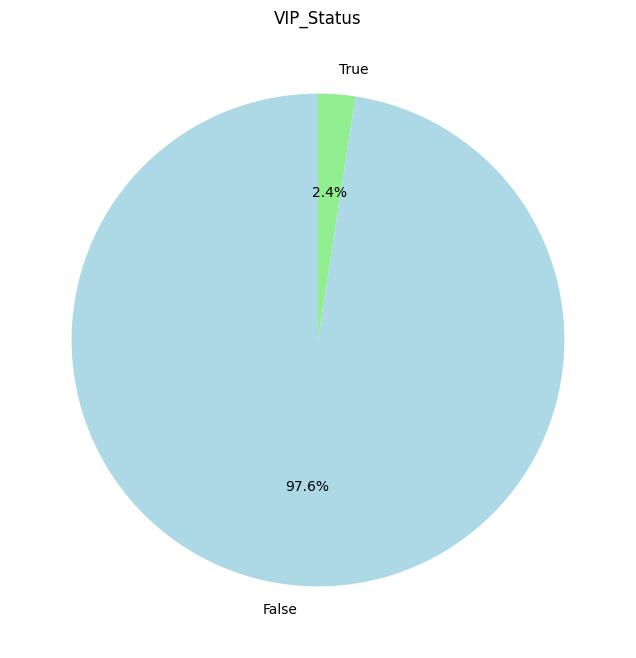

VIP
False    7397
True      184
Name: count, dtype: int64


In [34]:
VIP_Status=data_clean_5['VIP'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(VIP_Status, labels=VIP_Status.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('VIP_Status')
plt.show()
print(f"{VIP_Status}")

**Only 2.4% or 184 Passengers have VIP status**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14864\1781556036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Amenity', y='Spending', data=data_melted,jitter=True,palette=dark_palette)


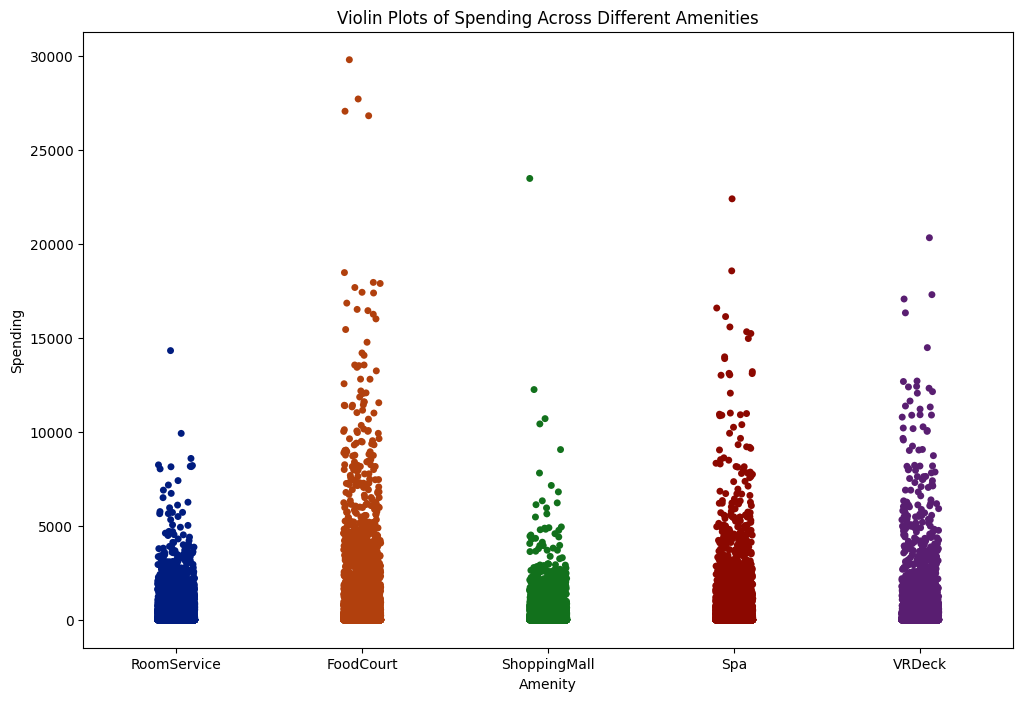

In [35]:
spending_columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
data_clean_6 = data.dropna(subset=spending_columns)
data_melted = data_clean_6.melt(value_vars=spending_columns, var_name='Amenity', value_name='Spending')
dark_palette = sns.color_palette("dark", 5)
plt.figure(figsize=(12, 8))
sns.stripplot(x='Amenity', y='Spending', data=data_melted,jitter=True,palette=dark_palette)

# Customize the axis labels and title
plt.xlabel('Amenity')
plt.ylabel('Spending')
plt.title('Violin Plots of Spending Across Different Amenities')

# Display the plot
plt.show()

**This shows that most of the high spending has occured in Food Court followed closely by Spa or VRDeck and then RoomService.At last least Spending is done in Mall. The data below also confirms the same**

In [36]:
Total_Room_Service=data['RoomService'].sum()
Total_Food_Court=data['FoodCourt'].sum()
Total_Shopping=data['ShoppingMall'].sum()
Total_Spa=data['Spa'].sum()
Total_VR_Deck=data['VRDeck'].sum()

In [37]:
print(f"Food:{Total_Food_Court} \nSpaCost:{Total_Spa} \nVRDeck:{Total_VR_Deck} \nRoomService:{Total_Room_Service} \nShopping:{Total_Shopping} ")

Food:3898237.0 
SpaCost:2647791.0 
VRDeck:2592790.0 
RoomService:1912541.0 
Shopping:1474092.0 


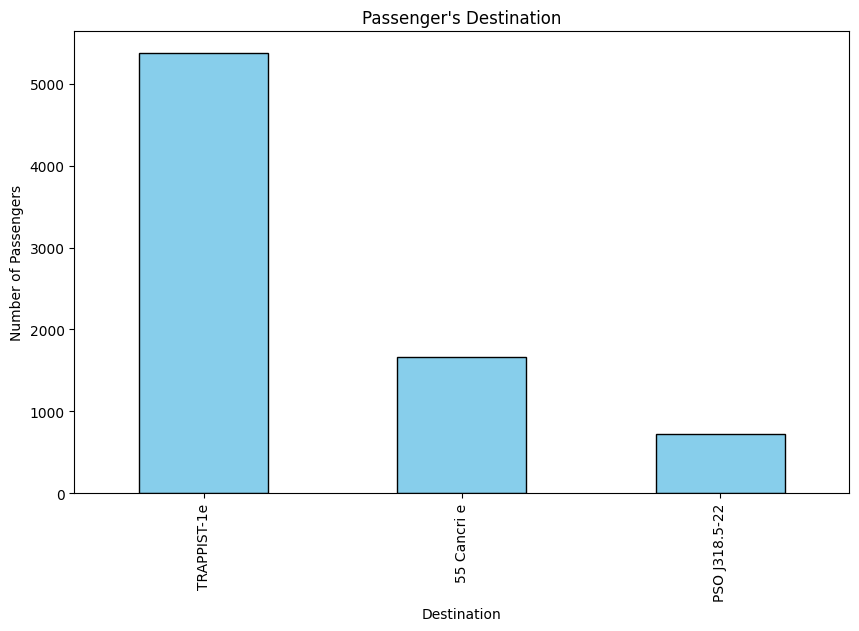

Percentage of Passengers in each Destination
TRAPPIST-1e      69.19
55 Cancri e      21.45
PSO J318.5-22     9.35
Name: count, dtype: float64


In [38]:
Passengers_Destination= data_clean_4['Destination'].value_counts()
Destination_Percentage = (Passengers_Destination/ len(data_clean_4) * 100).round(2)
Passengers_Destination.index.name='Destination'

plt.figure(figsize=(10, 6))
Passengers_Destination.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the axis labels and title
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.title('Passenger\'s Destination')

# Display the plot
plt.show()
print(f"Percentage of Passengers in each {Destination_Percentage}")

**Approx 69% of Passengers were going to TRAPPIST-1e and only 9% are going to PSO**

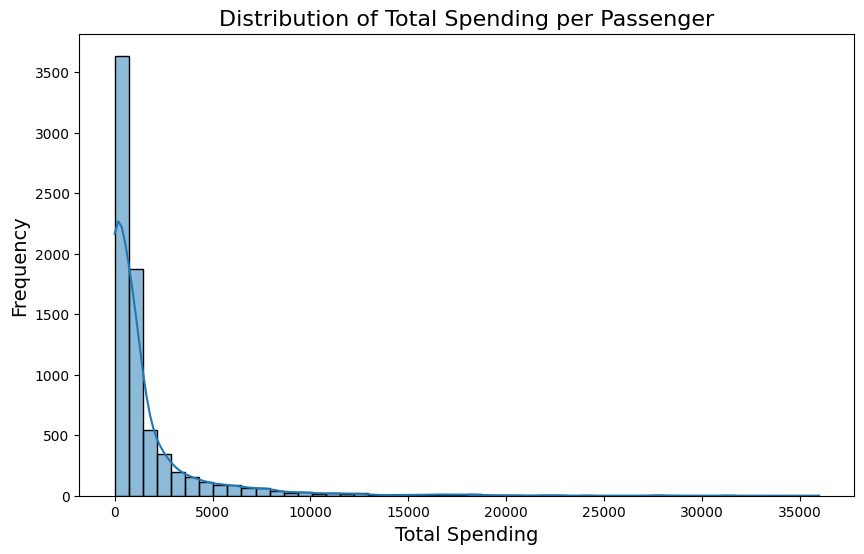

In [39]:
# Plot the histogram of total spending
plt.figure(figsize=(10, 6))
sns.histplot(data_clean_Scatter_AgevsRoomService_clean['TotalSpending'],bins=50,kde=True)
plt.title('Distribution of Total Spending per Passenger', fontsize=16)
plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

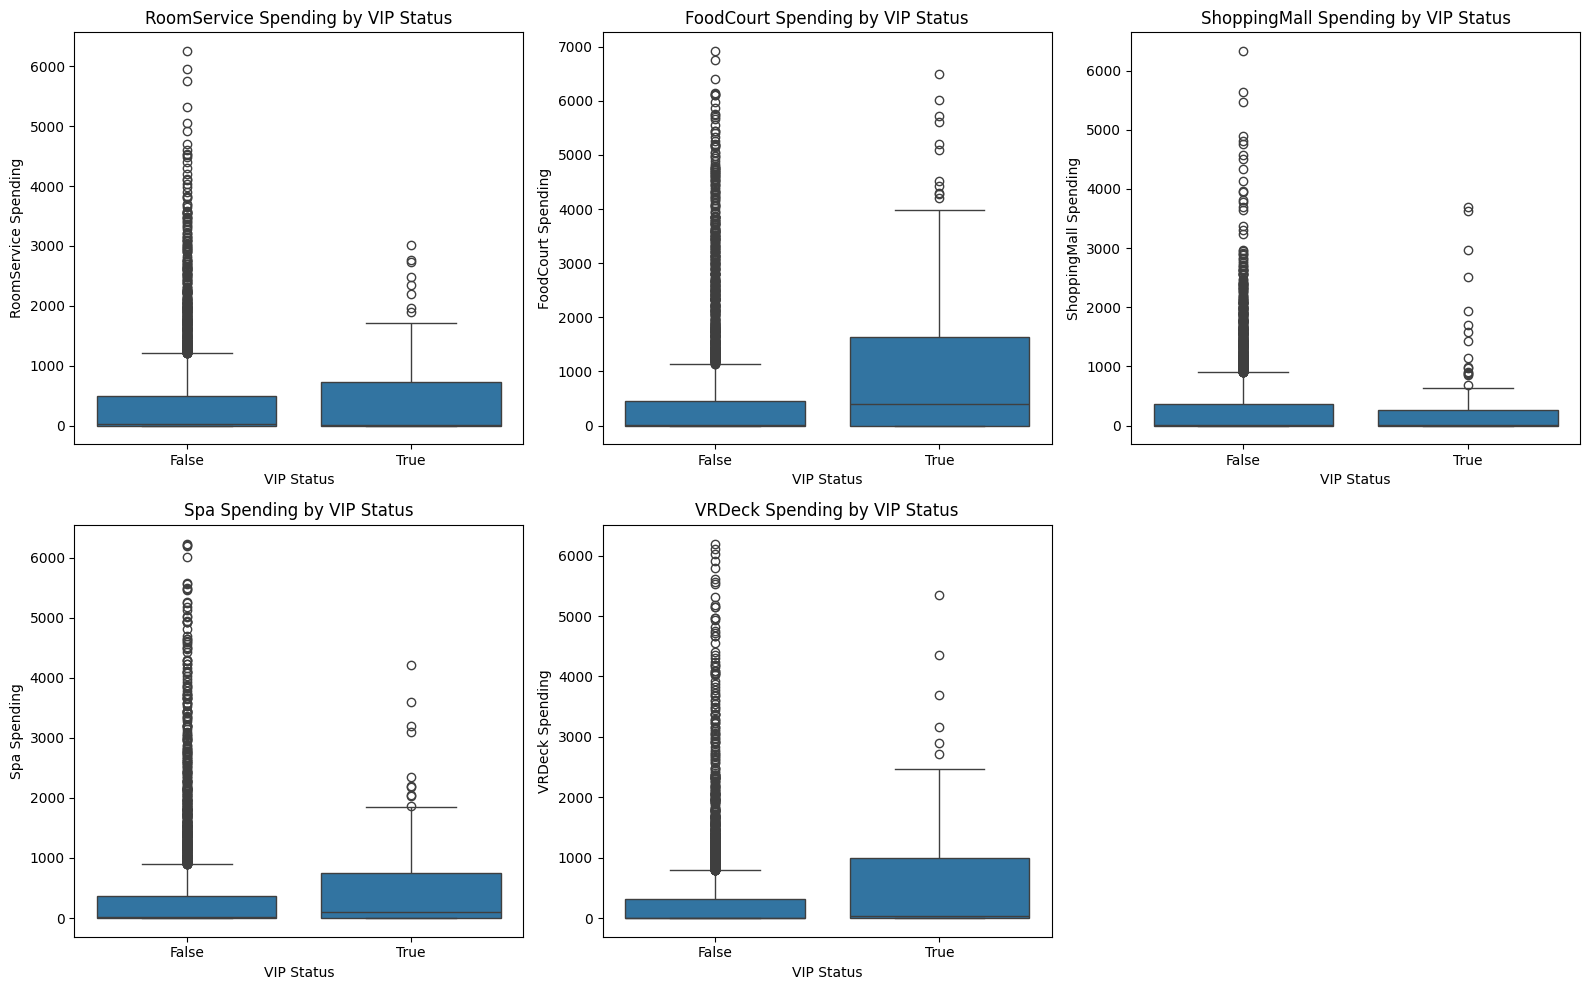

In [40]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(spending_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='VIP', y=column, data=data_clean_Scatter_AgevsRoomService_clean_2)
    plt.title(f'{column} Spending by VIP Status')
    plt.xlabel('VIP Status')
    plt.ylabel(f'{column} Spending')

plt.tight_layout()
plt.show()

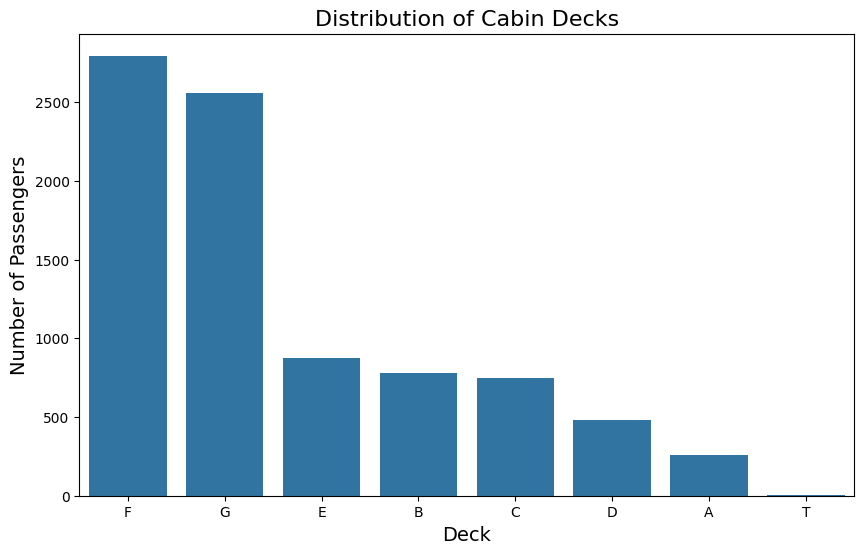

In [41]:
df=data

df['Deck'] = df['Cabin'].str[0]

# Plot the distribution of cabin decks
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', data=df, order=df['Deck'].value_counts().index)
plt.title('Distribution of Cabin Decks', fontsize=16)
plt.xlabel('Deck', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.show()

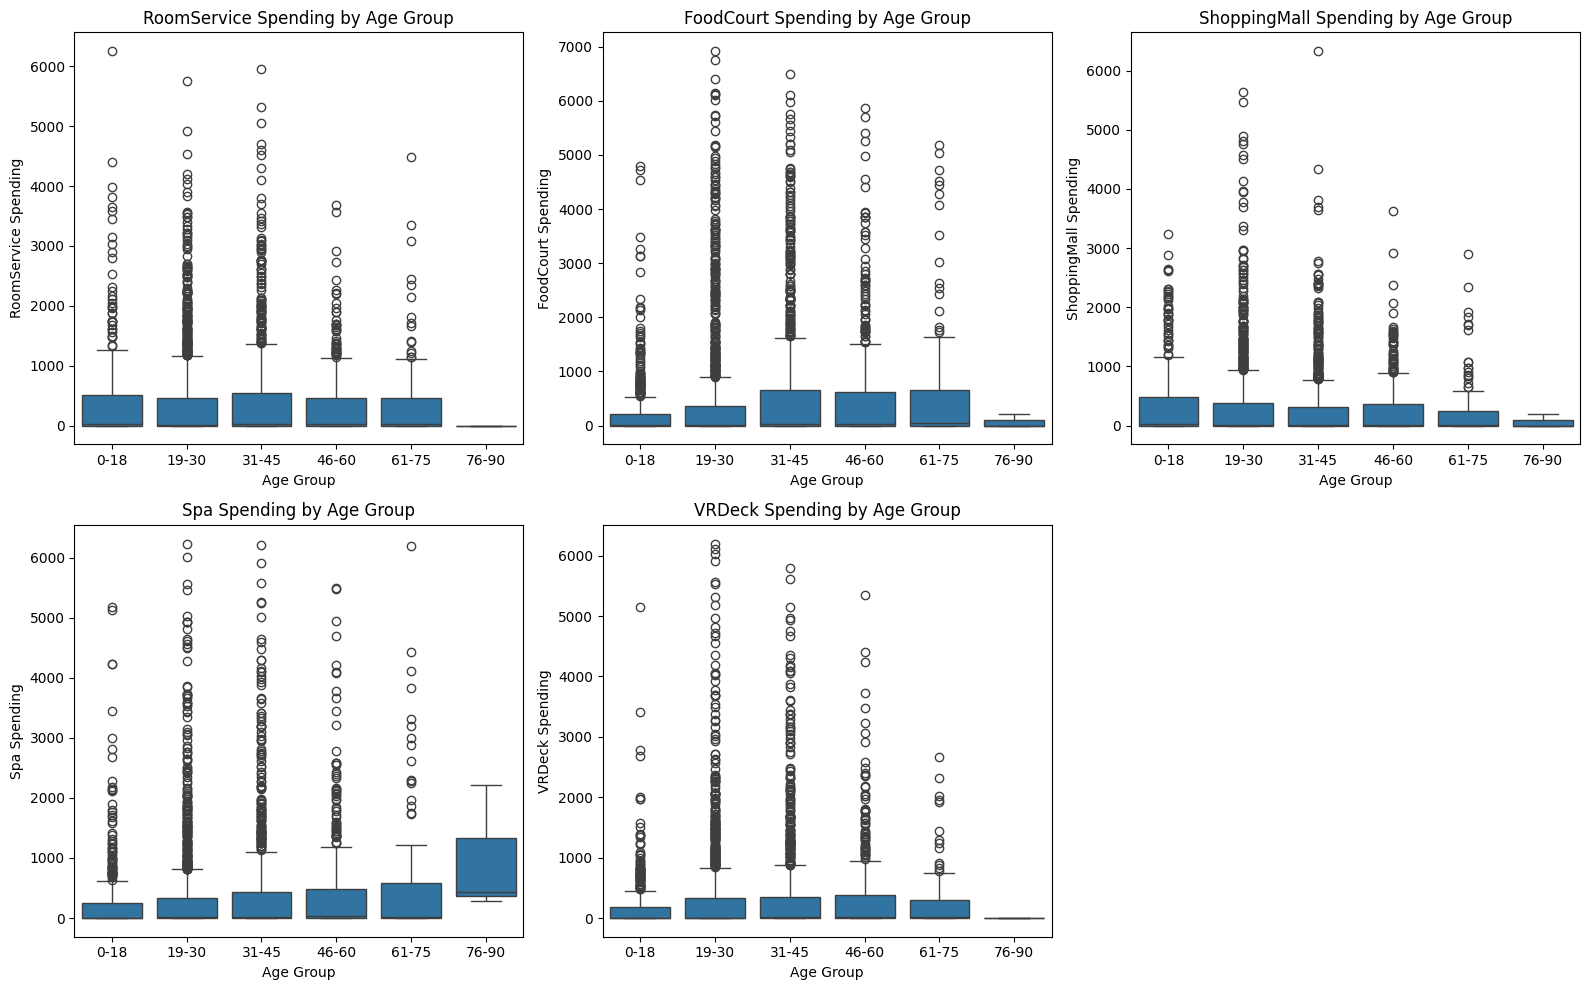

In [42]:
# Define age groups
age_bins = [0, 18, 30, 45, 60, 75, 90]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '76-90']

# Create a new column for age groups
df['AgeGroup'] = pd.cut(data_clean_Scatter_AgevsRoomService_clean_2['Age'], bins=age_bins, labels=age_labels)

# Plotting boxplots to compare spending for each amenity based on Age Group
plt.figure(figsize=(16, 10))

# Create a boxplot for each spending column by Age Group
for i, column in enumerate(spending_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='AgeGroup', y=column, data=df)
    plt.title(f'{column} Spending by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(f'{column} Spending')

plt.tight_layout()
plt.show()